CV Project Face Recognition CNN using Dlib

---

Kishan Murali - A20601493

Vandan Vaishya - A20552904

---


Flow of Content: (Represents the project workflow)


### 1. Introduction
Objective: Develop an efficient and robust facial emotion recognition system using convolutional neural networks (CNN) to classify emotions into seven categories: angry, disgust, fear, happy, sad, surprise, and neutral.
Datasets: Use the JAFFE and KDEF datasets, accessed from Google Drive, which contain grayscale images of faces with labeled emotions.
### 2. Data Preparation
Face Detection:
Use a landmark-based algorithm, such as dlib’s 68-point facial landmark detector, to locate and crop facial regions.
Crop and mask regions covering the primary face features (e.g., jawline, eyebrows, eyes), using landmarks 1-27 and convex hull masking to extract the face region.
### 3. Preprocessing
Contrast and Noise Handling:
Histogram Equalization: Apply histogram equalization on the cropped faces to normalize intensity and enhance contrast.
Noise Reduction: Use a bilateral filter to smooth the images while preserving edges.
Edge Enhancement: Apply a 2D convolutional filter for high-frequency edge enhancement to strengthen facial feature visibility.
Image Resizing: Resize all images to a standard dimension of 180x180 pixels.
### 4. Model Architecture
CNN Structure:

Convolutional Layers: The model has three convolutional layers, each followed by batch normalization for training stability. The convolutional layers use the ReLU activation function, helping the model capture essential features from the input images. Dropout is applied after each convolutional block to reduce the risk of overfitting.

Pooling Layers: The model includes alternating max-pooling and average-pooling layers. These pooling layers help in reducing the spatial dimensions, focusing on the most significant features while reducing computational load.

Fully Connected Layers: After flattening the output from the convolutional layers, the model has two dense (fully connected) layers. These dense layers are designed to learn complex representations from the extracted features. Dropout and batch normalization are applied to improve regularization and training stability.

Output Layer: The final dense layer with softmax activation outputs the probabilities for each of the seven emotion classes (Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise). The softmax activation function enables multi-class classification, where each class is assigned a probability.
### 5. Training Process
Epochs: 30
Batch Size: Set batch size to 32
Early Stopping: Implement early stopping to halt training once validation accuracy plateaus, avoiding overfitting.

### 6. Evaluation Metrics
Accuracy: Track accuracy for each class to measure the model’s overall performance.
Precision, Recall, F1-Score: Calculate these metrics per class to gauge the model's performance on individual emotions.

Mounting Google Drive

In [2]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [2]:
!rm -rf /content/drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
jaffe_path = '/content/drive/MyDrive/CV_Project_Dataset/jaffedbase'
kdef_path = '/content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF'

In [ ]:
import os
print(os.listdir(jaffe_path))
print(os.listdir(kdef_path))

['YM.FE2.68.tiff', 'YM.FE3.69.tiff', 'YM.FE4.70.tiff', 'YM.HA1.52.tiff', 'YM.HA2.53.tiff', 'YM.HA3.54.tiff', 'YM.NE1.49.tiff', 'YM.NE2.50.tiff', 'YM.NE3.51.tiff', 'YM.SA1.55.tiff', 'YM.SA2.56.tiff', 'YM.SA3.57.tiff', 'YM.SU1.58.tiff', 'YM.SU2.59.tiff', 'YM.SU3.60.tiff', 'KR.AN1.83.tiff', 'KR.AN2.84.tiff', 'KR.AN3.85.tiff', 'KR.DI1.86.tiff', 'KR.DI2.87.tiff', 'KR.DI3.88.tiff', 'KR.FE1.89.tiff', 'KR.FE2.90.tiff', 'KR.FE3.91.tiff', 'KR.HA1.74.tiff', 'KR.HA2.75.tiff', 'KR.NE1.71.tiff', 'KR.NE2.72.tiff', 'KR.NE3.73.tiff', 'KR.SA1.77.tiff', 'KR.SA2.78.tiff', 'KR.SA3.79.tiff', 'KR.SU1.80.tiff', 'KR.SU2.81.tiff', 'KR.SU3.82.tiff', 'MK.AN1.125.tiff', 'MK.AN2.126.tiff', 'MK.AN3.127.tiff', 'MK.DI1.128.tiff', 'MK.DI2.129.tiff', 'MK.DI3.130.tiff', 'MK.FE1.131.tiff', 'MK.FE2.132.tiff', 'MK.FE3.133.tiff', 'MK.HA1.116.tiff', 'MK.HA2.117.tiff', 'MK.HA3.118.tiff', 'MK.NE1.113.tiff', 'MK.NE2.114.tiff', 'MK.NE3.115.tiff', 'MK.SA1.119.tiff', 'MK.SA2.120.tiff', 'MK.SA3.121.tiff', 'MK.SU1.122.tiff', 'MK.SU2.

Install 68 pointer dlib and other necessary libraries:

In [5]:
!pip install dlib

In [ ]:
import os
import urllib.request
import bz2

# Define file URLs and paths
url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
compressed_path = '/content/shape_predictor_68_face_landmarks.dat.bz2'
extracted_path = '/content/drive/MyDrive/CV_Project_Dataset/shape_predictor_68_face_landmarks.dat'

# Download the compressed .bz2 file
urllib.request.urlretrieve(url, compressed_path)

# Extract the .dat file from .bz2
with bz2.open(compressed_path, 'rb') as f_in, open(extracted_path, 'wb') as f_out:
    f_out.write(f_in.read())

# Clean up by removing the .bz2 file
os.remove(compressed_path)

print(f"Model saved to {extracted_path}")

Model saved to /content/drive/MyDrive/CV_Project_Dataset/shape_predictor_68_face_landmarks.dat


Import libraries and load the model for face detection:

In [ ]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the dlib facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/CV_Project_Dataset/shape_predictor_68_face_landmarks.dat')

Define functions for face detection and extraction:(convex hull)

In [ ]:
def get_landmarks(image):
    # Check if the image is already grayscale
    if len(image.shape) == 2:  # Grayscale image has 2 dimensions
        gray = image
    else:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    if len(faces) > 0:
        landmarks = predictor(gray, faces[0])
        points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return points
    else:
        return None


def crop_face(image, landmarks):
    points = np.array(landmarks[0:27])  # Using points 1-27 for the face region
    hull = cv2.convexHull(points)
    mask = np.zeros_like(image)
    cv2.fillConvexPoly(mask, hull, 255)
    face = cv2.bitwise_and(image, mask)
    x, y, w, h = cv2.boundingRect(hull)
    return face[y:y+h, x:x+w]

Testing the Image for display

Testing on JAFFE sample image (grayscale):


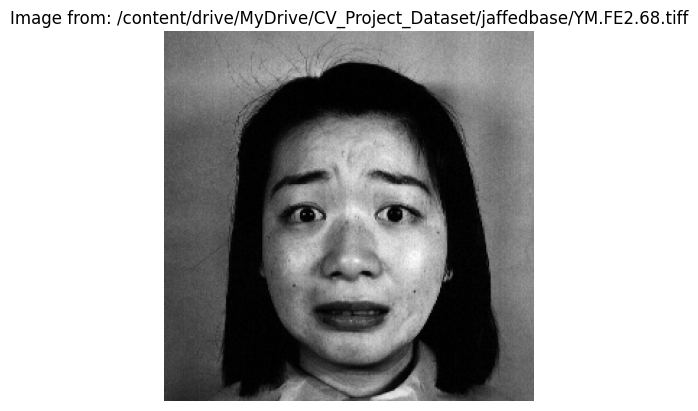

Testing on KDEF sample image (color):


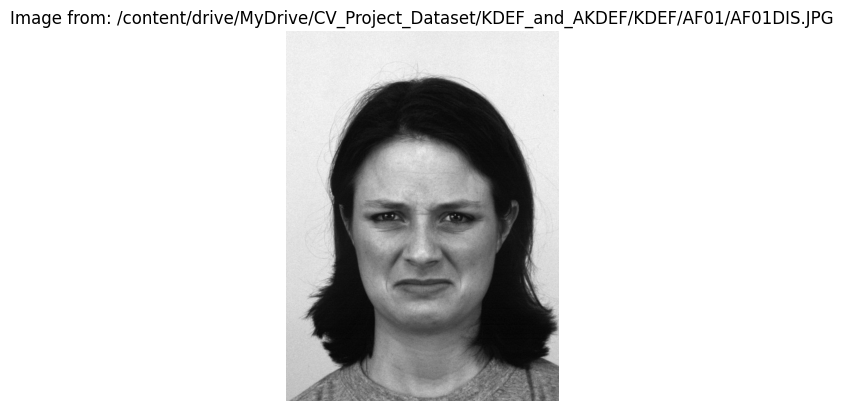

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Define paths for sample images from both datasets
jaffe_sample_path = '/content/drive/MyDrive/CV_Project_Dataset/jaffedbase/YM.FE2.68.tiff'
kdef_sample_path = '/content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF/AF01/AF01DIS.JPG'

def load_image(image_path, color_mode='color'):
    """Load image with specified color mode ('color' or 'grayscale')."""
    if color_mode == 'grayscale':
        return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        return cv2.imread(image_path)

def test_face_detection(image_path, color_mode='color'):
    # Load the image
    image = load_image(image_path, color_mode=color_mode)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Process the image as grayscale or color
    if color_mode == 'grayscale':
        # Display grayscale image directly
        plt.imshow(image, cmap='gray')
    else:
        # Convert BGR to RGB for Matplotlib display if in color
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)

    plt.axis('off')
    plt.title(f"Image from: {image_path}")
    plt.show()

# Test on JAFFE dataset as grayscale
print("Testing on JAFFE sample image (grayscale):")
test_face_detection(jaffe_sample_path, color_mode='grayscale')

# Test on KDEF dataset as color
print("Testing on KDEF sample image (color):")
test_face_detection(kdef_sample_path, color_mode='grayscale')


Conversion to grayscale

In [ ]:
import os
import cv2

def convert_to_grayscale(input_dir, output_dir):

    # Checking if the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each file in the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            # Construct full file path
            image_path = os.path.join(root, file)
            # Read the image in color
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            # Checking if the image is loaded properly
            if image is None:
                print(f"Failed to load image: {image_path}")
                continue

            # Convert the image to grayscale
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Create the corresponding path in the output directory
            relative_path = os.path.relpath(root, input_dir)
            output_subdir = os.path.join(output_dir, relative_path)
            os.makedirs(output_subdir, exist_ok=True)
            output_path = os.path.join(output_subdir, file)

            # Save the grayscale image
            cv2.imwrite(output_path, grayscale_image)
            print(f"Saved grayscale image to: {output_path}")

# Specify the input and output directories
input_dir = '/content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF'
output_dir = '/content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale'

# Convert all images in the input directory to grayscale and save them
convert_to_grayscale(input_dir, output_dir)

Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06DIS.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06HAHL.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06SAFR.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06HAFL.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06ANHL.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06DIHL.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06ANHR.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale/BM06/BM06DIFL.JPG
Saved grayscale image to: /content/drive/MyDrive/CV_Project_Dataset/KDEF_

# Step 2: Image Cropping and Resizing for All Images

Image Cropping and histogram equalization


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image

# Paths to JAFFE and KDEF datasets
jaffe_path = '/content/drive/MyDrive/CV_Project_Dataset/jaffedbase'
kdef_path = '/content/drive/MyDrive/CV_Project_Dataset/KDEF_and_AKDEF/KDEF_Grayscale'

# Output directories for cropped faces
jaffe_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE'
kdef_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF'

# Checking if output directories exist
os.makedirs(jaffe_output_dir, exist_ok=True)
os.makedirs(kdef_output_dir, exist_ok=True)

def enhance_contrast(image):
    return cv2.equalizeHist(image)

def save_cropped_face(image, output_path):
    """Save the cropped face to the specified output path."""
    if image is None or image.size == 0:
        print(f"Skipping empty image at {output_path}")
        return
    # Convert to grayscale if not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast
    image = enhance_contrast(image)

    # Save the enhanced image
    cv2.imwrite(output_path, image)


def process_dataset(input_dir, output_dir, color_mode='gray'):
    """Process all images in a dataset directory."""
    for root, _, files in os.walk(input_dir):
        for file in files:
            image_path = os.path.join(root, file)
            image = load_image(image_path, color_mode=color_mode)

            if image is not None:
                # Detect landmarks and crop face
                landmarks = get_landmarks(image)
                if landmarks:
                    cropped_face = crop_face(image, landmarks)

                    # Saving if the cropped face is not None
                    if cropped_face is not None:
                        output_path = os.path.join(output_dir, file)
                        save_cropped_face(cropped_face, output_path)
                        print(f"Saved cropped face to: {output_path}")
                    else:
                        print(f"Cropped face is None for {image_path}")
                else:
                    print(f"No face detected in {image_path}")
            else:
                print(f"Failed to load image {image_path}")

# Processing both KDEF and JAFFE datasets in grayscale mode

print("Processing JAFFE dataset...")
process_dataset(jaffe_path, jaffe_output_dir, color_mode='grayscale')

print("Processing KDEF dataset...")
process_dataset(kdef_path, kdef_output_dir, color_mode='grayscale')


Processing JAFFE dataset...
Processing KDEF dataset...


Applying Bilateral Filtering to reduce Noise on(Cropped_KDEF and Croppeed_jaffedbase)

In [ ]:
import os
import cv2

# Input directories for cropped and histogram-equalized images
jaffe_input_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE'
kdef_input_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF'

# Output directories for cropped, histogram-equalized, and bilateral filtered images
jaffe_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF'
kdef_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF'

# Checking if output directories exist
os.makedirs(jaffe_output_dir, exist_ok=True)
os.makedirs(kdef_output_dir, exist_ok=True)

def apply_bilateral_filter(image):
    """Apply bilateral filtering to reduce noise while preserving edges."""
    return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

def process_images(input_dir, output_dir):
    """Process images by applying bilateral filtering and saving them to the output directory."""
    for root, _, files in os.walk(input_dir):
        for file in files:
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Apply bilateral filtering
                filtered_image = apply_bilateral_filter(image)

                # Save the filtered image
                output_path = os.path.join(output_dir, file)
                cv2.imwrite(output_path, filtered_image)
                print(f"Processed and saved: {output_path}")
            else:
                print(f"Failed to load image: {image_path}")

# Apply bilateral filtering and save for JAFFE and KDEF datasets
print("Processing JAFFE dataset...")
process_images(jaffe_input_dir, jaffe_output_dir)

print("Processing KDEF dataset...")
process_images(kdef_input_dir, kdef_output_dir)


Processing JAFFE dataset...
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.DI1.149.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.DI2.150.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.DI3.151.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.FE1.152.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.FE2.153.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.FE3.154.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.HA1.137.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.HA2.138.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF/UY.HA3.139.tiff
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/

Sharpening the image

In [ ]:
import cv2
import os
import numpy as np

# Paths for JAFFE and KDEF datasets after histogram equalization and bilateral filtering
jaffe_input_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF'
kdef_input_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF'

# Output directories for sharpened images
jaffe_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened'
kdef_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF_Sharpened'

# Checking if output directories exist
os.makedirs(jaffe_output_dir, exist_ok=True)
os.makedirs(kdef_output_dir, exist_ok=True)

def sharpen_image(image):
    # Define the sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    # Apply the sharpening filter
    return cv2.filter2D(image, -1, kernel)

def process_images(input_dir, output_dir):
    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Skipping {filename}: Could not load image.")
            continue

        # Apply sharpening
        sharpened_image = sharpen_image(image)

        # Save the sharpened image
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, sharpened_image)
        print(f"Saved sharpened image to: {output_path}")

# Apply sharpening to both JAFFE and KDEF datasets
print("Processing JAFFE dataset...")
process_images(jaffe_input_dir, jaffe_output_dir)

print("Processing KDEF dataset...")
process_images(kdef_input_dir, kdef_output_dir)


Processing JAFFE dataset...
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.DI1.149.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.DI2.150.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.DI3.151.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.FE1.152.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.FE2.153.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.FE3.154.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.HA1.137.tiff
Saved sharpened image to: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened/UY.HA2.138.tiff
Saved sharpened image to: /content/drive/MyD

jaffedbase .tiff to .jpg conversion

In [ ]:
from PIL import Image
import os

def convert_all_tiff_to_jpg(input_dir, output_dir):
    """
    Convert all TIFF images in the input directory to JPG format and save them in the output directory.
    """
    # Checking if the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through all files in the input directory
    for filename in os.listdir(input_dir):
        # Check if the file is a TIFF image
        if filename.endswith(".tiff") or filename.endswith(".tif"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.jpg")

            try:
                # Open and convert the image to JPG
                with Image.open(input_path) as img:
                    img = img.convert("RGB")  # Convert to RGB mode for JPG format
                    img.save(output_path, "JPEG")
                    print(f"Converted and saved: {output_path}")
            except OSError as e:
                print(f"Skipping {filename} due to an error: {e}")

# Example usage
input_dir = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened"  # Directory with TIFF images
output_dir = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG"  # Directory to save JPG images

convert_all_tiff_to_jpg(input_dir, output_dir)


Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.DI1.149.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.DI2.150.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.DI3.151.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.FE1.152.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.FE2.153.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.FE3.154.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.HA1.137.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG/UY.HA2.138.jpg
Converted and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sha

Resizing Image to 180*180

In [ ]:
import cv2
import os
import numpy as np

def resize_with_padding(image, target_size=(180, 180)):
    """
    Resize the image to the target size with padding if needed to maintain aspect ratio.
    """
    h, w = image.shape[:2]
    # Calculate scale and padding
    scale = min(target_size[0] / h, target_size[1] / w)
    new_w, new_h = int(w * scale), int(h * scale)

    # Resize the image
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

    # Calculate padding sizes and checking if they are non-negative
    top_pad = max(0, (target_size[1] - new_h) // 2)
    bottom_pad = max(0, target_size[1] - new_h - top_pad)
    left_pad = max(0, (target_size[0] - new_w) // 2)
    right_pad = max(0, target_size[0] - new_w - left_pad)

    # Create the padded image
    padded_image = cv2.copyMakeBorder(
        resized_image, top_pad, bottom_pad, left_pad, right_pad,
        borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )
    return padded_image

def process_images(input_dir, output_dir, target_size=(180, 180)):
    """
    Process all images in the input directory, resize to target size with padding if needed,
    and save to the output directory.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to load image: {filename}")
            continue

        # Resize with padding
        resized_image = resize_with_padding(image, target_size)

        # Save the resized image
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)
        print(f"Processed and saved: {output_path}")

# Setting directories for the new paths
input_directory1 = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF_Sharpened"  # Directory with cropped KDEF images
output_directory1 = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF_Sharpened_180*180"  # Directory to save resized KDEF images

input_directory2 = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG"  # Directory with cropped JAFFE images
output_directory2 = "/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180"  # Directory to save resized JAFFE images

# Processing all images in the input directory and save resized versions to the output directory
process_images(input_directory2, output_directory2, target_size=(180, 180))
process_images(input_directory1, output_directory1, target_size=(180, 180))


Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.DI1.149.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.DI2.150.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.DI3.151.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.FE1.152.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.FE2.153.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.FE3.154.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.HA1.137.jpg
Processed and saved: /content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180/UY.HA2.138.jpg
Processed and saved: /co

### STEP 3: Batch Processing

Train/Test/Validation

In [ ]:
import os
import random
import shutil

# Directories for cropped faces (Input from KDEF and JAFFE)
kdef_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_KDEF_AP_HEBF_Sharpened_180*180'
jaffe_output_dir = '/content/drive/MyDrive/CV_Project_Dataset/Cropped_JAFFE_AP_HEBF_Sharpened_JPG_180*180'

# Destination directories for train, validation, and test splits (Output)
base_split_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

# Checking if directories exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Gather all images from KDEF and JAFFE
all_images = []
for dataset_dir in [kdef_output_dir, jaffe_output_dir]:
    for filename in os.listdir(dataset_dir):
        image_path = os.path.join(dataset_dir, filename)
        if os.path.isfile(image_path):
            all_images.append(image_path)

# Shuffle and split dataset
random.shuffle(all_images)
train_split = int(0.7 * len(all_images))
val_split = int(0.85 * len(all_images))

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

# Move files to respective directories
def move_files(file_list, dest_dir):
    for file_path in file_list:
        filename = os.path.basename(file_path)
        dest_path = os.path.join(dest_dir, filename)
        shutil.copy2(file_path, dest_path)

# Moving files to train, val, and test directories
move_files(train_images, train_dir)
move_files(val_images, val_dir)
move_files(test_images, test_dir)

# Summary of dataset split
print("Data split complete:")
print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")


Data split complete:
Training set: 2216 images
Validation set: 475 images
Test set: 476 images


Displaying Train, Test and Validation

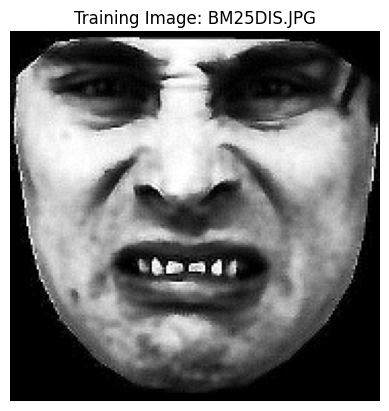

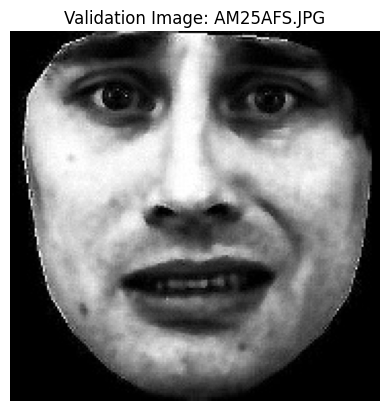

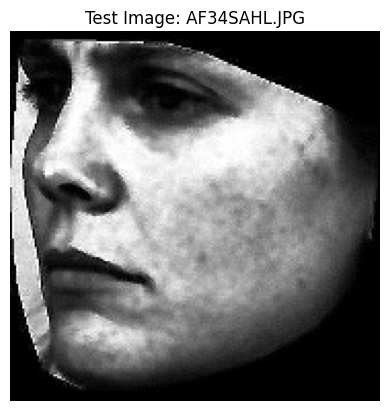

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to training, validation, and test directories
train_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train'
val_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/val'
test_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/test'

def display_random_image(directory, title):
    """Display a random image from a specified directory."""
    # Get list of files in directory
    files = os.listdir(directory)
    # Select a random file
    random_file = random.choice(files)
    # Load the image
    image_path = os.path.join(directory, random_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"{title}: {random_file}")
    plt.show()

# Display one random image from each set
display_random_image(train_dir, "Training Image")
display_random_image(val_dir, "Validation Image")
display_random_image(test_dir, "Test Image")

Organising File based on class

In [ ]:
import os
import shutil

# Define paths for train, val, and test directories
base_split_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

# Define the mapping from filename code to emotion
emotion_map = {
    "AF": "Fear",
    "AN": "Angry",
    "DI": "Disgust",
    "HA": "Happy",
    "NE": "Neutral",
    "SA": "Sad",
    "SU": "Surprise"
}

# Function to determine emotion from filename structure
def get_emotion_from_filename(filename):
    if filename[1] == ".":  # Identifies JAFFE images (2nd character is '.')
        # Use the 3rd and 4th characters for JAFFE dataset
        emotion_code = filename[2:4]
    else:  # Identifies KDEF images
        # Use the 5th and 6th characters for KDEF dataset
        emotion_code = filename[4:6]

    # Retrieving the emotion from the map
    emotion = emotion_map.get(emotion_code)
    print(f"Filename: {filename} | Emotion Code: {emotion_code} | Emotion: {emotion}")  # Debugging line
    return emotion

# Function to organize images into subdirectories by emotion
def organize_images_by_emotion(image_paths, base_output_dir):
    for image_path in image_paths:
        filename = os.path.basename(image_path)
        emotion = get_emotion_from_filename(filename)

        if emotion:
            # Create the emotion directory if it doesn't exist
            emotion_dir = os.path.join(base_output_dir, emotion)
            os.makedirs(emotion_dir, exist_ok=True)

            # Move the image to the emotion directory
            shutil.move(image_path, os.path.join(emotion_dir, filename))
            print(f"Moved {filename} to {emotion_dir}")
        else:
            print(f"Emotion not found for {filename}, skipping.")

# Organize images in each split directory
organize_images_by_emotion([os.path.join(train_dir, f) for f in os.listdir(train_dir)], train_dir)
organize_images_by_emotion([os.path.join(val_dir, f) for f in os.listdir(val_dir)], val_dir)
organize_images_by_emotion([os.path.join(test_dir, f) for f in os.listdir(test_dir)], test_dir)

print("Dataset organization complete.")


Streaming output truncated to the last 5000 lines.
Moved BM25DIHR.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Disgust
Filename: AM23AFHR.JPG | Emotion Code: AF | Emotion: Fear
Moved AM23AFHR.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Fear
Filename: BM25SAHL.JPG | Emotion Code: SA | Emotion: Sad
Moved BM25SAHL.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Sad
Filename: AM33DIHL.JPG | Emotion Code: DI | Emotion: Disgust
Moved AM33DIHL.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Disgust
Filename: AM27ANHL.JPG | Emotion Code: AN | Emotion: Angry
Moved AM27ANHL.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Angry
Filename: BF09NEHL.JPG | Emotion Code: NE | Emotion: Neutral
Moved BF09NEHL.JPG to /content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train/Neutral
Filename: AF03NEHR.JPG | Emotion Code: NE | Emotion: Neutral
Moved A

Visualisation of the Images in various

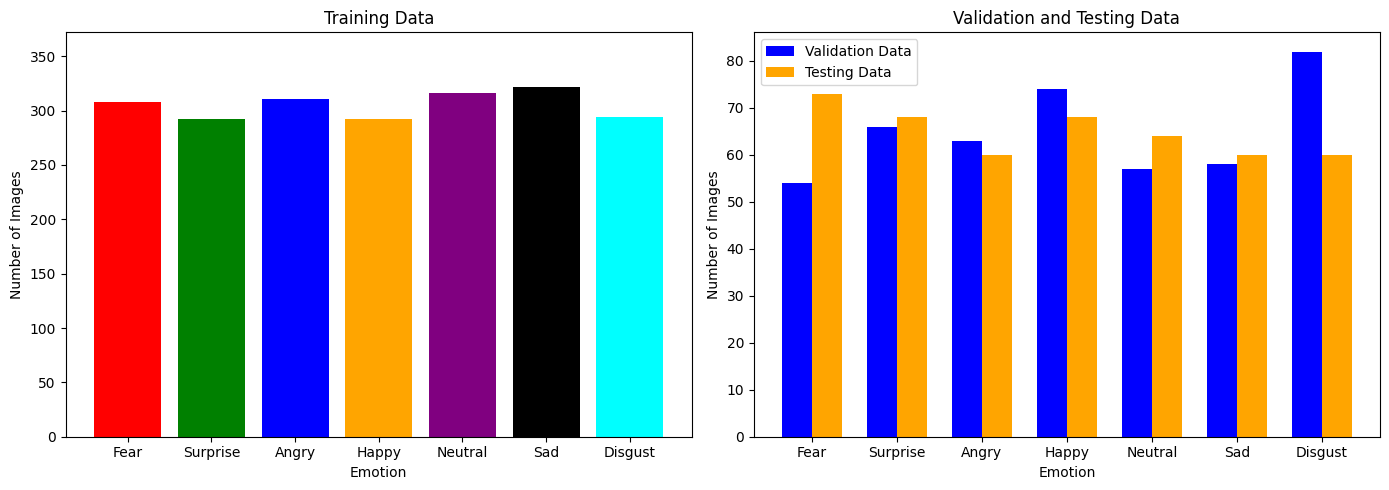

In [4]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Define paths for the train, validation, and test directories
base_split_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

# Function to count images in each emotion category
def count_images_in_classes(directory):
    class_counts = {}
    for emotion_dir in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion_dir)
        if os.path.isdir(emotion_path):
            class_counts[emotion_dir] = len(os.listdir(emotion_path))
    return class_counts

# Count images in each set
train_counts = count_images_in_classes(train_dir)
val_counts = count_images_in_classes(val_dir)
test_counts = count_images_in_classes(test_dir)

# Plot the data
emotions = list(train_counts.keys())
train_values = [train_counts[emotion] for emotion in emotions]
val_values = [val_counts.get(emotion, 0) for emotion in emotions]
test_values = [test_counts.get(emotion, 0) for emotion in emotions]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Training Data
ax1.bar(emotions, train_values, color=['red', 'green', 'blue', 'orange', 'purple', 'black', 'cyan'])
ax1.set_title('Training Data')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Number of Images')
ax1.set_ylim(0, max(train_values) + 50)

# Plot for Validation and Testing Data
bar_width = 0.35
r1 = range(len(emotions))
r2 = [x + bar_width for x in r1]

ax2.bar(r1, val_values, color='blue', width=bar_width, label='Validation Data')
ax2.bar(r2, test_values, color='orange', width=bar_width, label='Testing Data')
ax2.set_title('Validation and Testing Data')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Number of Images')
ax2.set_xticks([r + bar_width / 2 for r in range(len(emotions))])
ax2.set_xticklabels(emotions)
ax2.legend()

plt.tight_layout()
plt.show()
